In [1]:
with open('Data_Johanna_Heins.txt') as file:
    data = file.read()

print(data) 

FileNotFoundError: [Errno 2] No such file or directory: 'Data_Johanna_Heins.txt'

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from glob import glob
import os
import scipy as sp

In [6]:
blocks = data.split('\n\n')
len(blocks)
print(blocks)

['dateTime,lightIntensity,temperature,relativeHumidity,ppmCO2\n2022-01-04 14:41:09,250,19.24,41.82,498\n2022-01-04 14:41:10,245,19.26,41.78,498\n2022-01-04 14:41:11,245,19.26,41.81,498\n2022-01-04 14:41:12,246,19.25,41.78,498\n2022-01-04 14:41:13,246,19.26,41.80,498\n2022-01-04 14:41:14,247,19.26,41.78,498\n2022-01-04 14:41:15,247,19.25,41.79,498\n2022-01-04 14:41:16,248,19.28,41.78,498\n2022-01-04 14:41:17,248,19.26,41.79,498\n2022-01-04 14:41:18,248,19.26,41.78,498\n2022-01-04 14:41:19,295,19.29,41.77,498\n2022-01-04 14:41:20,249,19.26,41.76,498\n2022-01-04 14:41:21,292,19.27,41.76,498\n2022-01-04 14:41:22,250,19.28,41.76,498\n2022-01-04 14:41:23,289,19.28,41.73,498\n2022-01-04 14:41:24,251,19.29,41.74,498\n2022-01-04 14:41:25,287,19.27,41.72,498\n2022-01-04 14:41:26,252,19.28,41.71,498\n2022-01-04 14:41:27,285,19.28,41.70,498\n2022-01-04 14:41:28,253,19.30,41.70,498\n2022-01-04 14:41:29,283,19.30,41.69,498\n2022-01-04 14:41:30,253,19.32,41.70,498\n2022-01-04 14:41:31,282,19.28,41.66

In [8]:
import re

def empty_line_split(string):
    """ function to split a string on an arbitrary number of empty lines """
    regex = r"(?:\n){2,}"
    # re.split is a method of the re package to directly split according to the defined pattern
    # analoguously to str.split()
    # strip the string before splitting
    return re.split(regex, string.strip())

In [9]:
blocks_re = empty_line_split(data)

len(blocks_re)

5

In [10]:
blocks_re[3] #remember: start counting with 0!

'dateTime,lightIntensity,temperature,relativeHumidity,ppmCO2\n2022-01-05 12:30:11,691,14.70,41.29,532\n2022-01-05 12:30:12,675,14.73,41.25,532\n2022-01-05 12:30:13,676,14.72,41.21,537\n2022-01-05 12:30:14,678,14.75,41.18,537\n2022-01-05 12:30:15,672,14.77,41.15,537\n2022-01-05 12:30:16,673,14.77,41.11,537\n2022-01-05 12:30:17,674,14.79,41.08,537\n2022-01-05 12:30:18,674,14.81,41.02,537\n2022-01-05 12:30:19,675,14.82,41.02,537\n2022-01-05 12:30:20,676,14.82,40.99,537\n2022-01-05 12:30:21,677,14.84,40.92,537\n2022-01-05 12:30:22,679,14.86,40.91,532\n2022-01-05 12:30:23,687,14.89,40.86,532\n2022-01-05 12:30:24,688,14.88,40.83,532\n2022-01-05 12:30:25,680,14.89,40.79,532\n2022-01-05 12:30:26,681,14.88,40.75,532\n2022-01-05 12:30:27,683,14.93,40.71,532\n2022-01-05 12:30:28,683,14.94,40.69,532\n2022-01-05 12:30:29,684,14.97,40.66,532\n2022-01-05 12:30:30,685,14.95,40.60,532\n2022-01-05 12:30:31,686,14.96,40.57,532\n2022-01-05 12:30:32,687,14.98,40.54,532\n2022-01-05 12:30:33,688,14.99,40.50,

In [12]:
from io import StringIO

d = blocks_re[2]

# get the column header by splitting the first line
# first split yields a list of lines of which we choose the first ([0])
# second split applied to the first line yields individual column headers
header = d.split('\n')[0].split()

# generate a data array from the string, skipping the header line, using whitespace ('None') for column separation
col_data = np.genfromtxt(StringIO(d), delimiter = ",", skip_header = 1)

In [14]:
header

['dateTime,lightIntensity,temperature,relativeHumidity,ppmCO2']

In [15]:
col_data

array([[   nan,  98.  ,  21.36,  35.42, 483.  ],
       [   nan, 122.  ,  21.33,  35.41, 483.  ],
       [   nan,  72.  ,  21.34,  35.42, 483.  ],
       ...,
       [   nan, 104.  ,  21.57,  33.91, 453.  ],
       [   nan,  70.  ,  21.55,  33.91, 453.  ],
       [   nan, 105.  ,  21.58,  33.93, 453.  ]])

In [18]:
# string is again separated by a regular expression '\s+'
# header and columns are recognized 'automatically'

df = pd.read_csv(StringIO(d), sep='\s+', engine='python')

In [36]:
df

dateTime,lightIntensity,temperature,relativeHumidity,ppmCO2
2022-01-04                        18:55:05,98,21.36,35.42,483         
2022-01-04                       18:55:06,122,21.33,35.41,483         
2022-01-04                        18:55:07,72,21.34,35.42,483         
2022-01-04                       18:55:08,124,21.35,35.42,483         
2022-01-04                        18:55:09,71,21.34,35.41,483         
...                                                       ...         
2022-01-04                        20:47:15,96,21.59,33.92,453         
2022-01-04                        20:47:16,69,21.58,33.91,453         
2022-01-04                       20:47:17,104,21.57,33.91,453         
2022-01-04                        20:47:19,70,21.55,33.91,453         
2022-01-04                       20:47:20,105,21.58,33.93,453         

[6700 rows x 1 columns]

In [22]:
Date = col_data[:,0]
Light = col_data[:,1]
Temp = col_data[:,2]
Humidity = col_data[:,3]
Co2 = col_data[:,4]

In [26]:
Light

array([ 98., 122.,  72., ..., 104.,  70., 105.])

In [27]:
Date

array([nan, nan, nan, ..., nan, nan, nan])

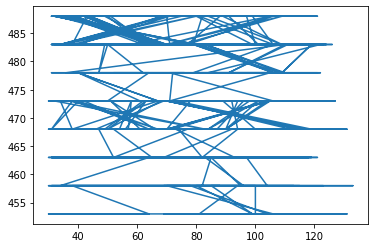

In [61]:
plt.plot(Light,Co2)